In [1]:
display(HTML("<style>.rendered_html.text_cell_render {max-width:700px; }</style>"));
push!(LOAD_PATH, "../src");
include("../src/pose.jl")

HTML{String}("<style>.rendered_html.text_cell_render {max-width:700px; }</style>")

In [13]:
#nbx --fname="src/house_expo_data.jl"
push!(LOAD_PATH, "../src");
include("../src/pose.jl")
import JSON
using StatsBase: mean, std
using Geometry: bounding_box, Segment, segments
using MyUtils: summarize_vars
using Colors, Plots
col = palette(:default);

fname = "../data/task_inputs/test_env_1.json"
d = JSON.parsefile(fname)

Dict{String, Any} with 4 entries:
  "env_name"      => "014e6d1cee6e6a1297a78f761fbc6700.json"
  "verts"         => Any[Any[13.24, 0.1], Any[13.23, 0.11], Any[13.23, 5.67], A…
  "paths"         => Any[Any[Any[2.06826, 17.1189], Any[2.78674, 16.8495], Any[…
  "clutter_verts" => Any[Any[Any[5.12083, 17.6568], Any[6.02083, 17.6568], Any[…

In [22]:
#nbx
function load_env(fname)
    d = JSON.parsefile(fname)
    verts    = Vector{Vector{Float64}}(d["verts"]);
    clutter  = Vector{Vector{Vector{Float64}}}(d["clutter_verts"]);
    _paths  = Vector{Vector{Vector{Float64}}}(d["paths"]);
    
    _segs   = segments(verts);
    _boxes  = vcat(segments.(clutter)...);
    _bb     = bounding_box(_segs)
    _center = mean(_bb);

    return _segs, _boxes, _paths
end

load_env (generic function with 1 method)

In [6]:
#nbx
verts   = Vector{Vector{Float64}}(d["verts"]);
clutter = Vector{Vector{Vector{Float64}}}(d["clutter_verts"]);
paths   = Vector{Vector{Vector{Float64}}}(d["paths"]);


In [7]:
#nbx
_segs   = segments(verts);
_boxes  = vcat(segments.(clutter)...);
_bb     = bounding_box(_segs)
_center = mean(_bb);

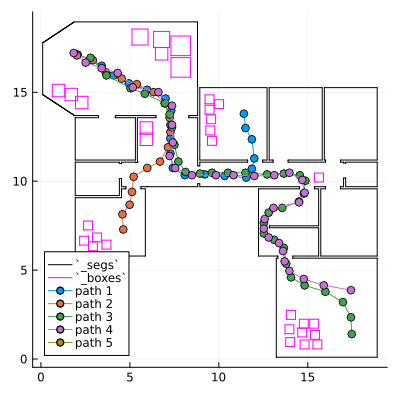

In [8]:
# ----------------
mypl = plot(size=(400,400), aspect_ration=:equal)
plot!(_segs, c=:black, label="`_segs`")
plot!(_boxes, c=:magenta, label="`_boxes`")
for (i,xs) in enumerate(paths)
    plot!(xs, marker=:o, c=col[i], label="path $i")
end

mypl

In [9]:
#nbx
# Choose path
i  = 3
xs = paths[i]

# Unpack path into 
# poses and controls
_dxs  = xs[2:end] - xs[1:end-1]
_hds  = angle.(_dxs)
_dhds = _hds[2:end] - _hds[1:end-1];
_xs   = xs[1:end-2];

In [21]:
#nbx
function unpack_path(path)
    xs = path

    # Unpack path into 
    # poses and controls
    _dxs  = xs[2:end] - xs[1:end-1]
    _hds  = angle.(_dxs)
    _dhds = _hds[2:end] - _hds[1:end-1];
    _xs   = xs[1:end-2]; 

    _ps = [Pose(x,hd) for (x,hd) in zip(_xs, _hds)];
    _us = [Control(dx,dhd) for (dx,dhd) in zip(_dxs, _dhds)]

    _T  = length(_xs);

    return _ps, _us
end

unpack_path (generic function with 2 methods)

In [14]:
mean(_dxs), std(_dxs)

([-0.4588705357142858, 0.4855327380952381], [0.5607134949961156, 0.32087424590020897])

In [74]:
#nbx
_ps = [Pose(x,hd) for (x,hd) in zip(_xs, _hds)];
_us = [Control(dx,dhd) for (dx,dhd) in zip(_dxs, _dhds)]
_T  = length(_xs);

In [75]:
#nbx
println("Loading data from `$(fname)`, and\npopulating Main namespace with variables:\n")
summarize_vars(:(_segs, _boxes, _center, _xs, _hds, _ps, _dxs, _dhds, _us, _T))

Loading data from `../data/task_inputs/example_1.json`, and
populating Main namespace with variables:



_segs      Vector{Segment}
_boxes     Vector{Segment}
_center    Vector{Float64}
_xs        Vector{Vector{Float64}}
_hds       Vector{Float64}
_ps        Vector{Pose}
_dxs       Vector{Vector{Float64}}
_dhds      Vector{Float64}
_us        Vector{Control}
_T         Int64
